In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from utils.featureNormalize import featureNormalize
from utils.gradientDescentMulti import gradientDescentMulti
from utils.normalEquation import normalEquation

In [10]:
print('Loading Data ...\n\n\n')
data = np.loadtxt('ex1data2.txt', delimiter=",")
to_view = pd.read_csv('ex1data2.txt',sep=",",header = None)
X = data[:,0:2]
y = data[:,2]
m = len(y)

print('---------- First 10 examples from the dataset ----------')
print(pd.DataFrame(data).head(10))


Loading Data ...



---------- First 10 examples from the dataset ----------
        0    1         2
0  2104.0  3.0  399900.0
1  1600.0  3.0  329900.0
2  2400.0  3.0  369000.0
3  1416.0  2.0  232000.0
4  3000.0  4.0  539900.0
5  1985.0  4.0  299900.0
6  1534.0  3.0  314900.0
7  1427.0  3.0  198999.0
8  1380.0  3.0  212000.0
9  1494.0  3.0  242500.0


,0,1,2
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900
5,1985,4,299900
6,1534,3,314900
7,1427,3,198999
8,1380,3,212000
9,1494,3,242500


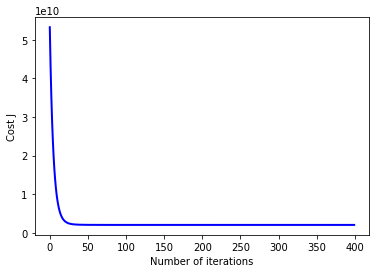

Theta computed from gradient descent: 340412.66, 109447.80, -6578.35


In [5]:
X_normalized, mu, sigma = featureNormalize(X)

#### Add intercept term to X

X_intercept = np.ones((m,1))
X_padded = np.hstack((X_intercept,X_normalized))

#### Gradient Descent 

alpha = 0.1
num_iters = 400

theta = np.zeros(3)
theta,J_history = gradientDescentMulti(X_padded,y,theta,alpha,num_iters)

# Plot the convergence graph

plt.plot(range(len(J_history)),J_history,'-b', linewidth=2)
plt.xlabel('Number of iterations')
plt.ylabel('Cost J')
plt.show()

print('Theta computed from gradient descent: {:.2f}, {:.2f}, {:.2f}'.format(theta[0],theta[1],theta[2]))


In [7]:
# Estimate the price of a 1650 sq-ft, 3 br house
X_features = [1, 1650, 3]
X_features [1:3] = (X_features [1:3] - mu) / sigma
price = np.dot(X_features, theta)

print('Predicted price of a 1650 sq-ft, 3 br house (using gradient descent): ${:.0f}'.format(price))


Predicted price of a 1650 sq-ft, 3 br house (using gradient descent): $293081


In [6]:
print('Solving with normal equations...')

data = np.loadtxt('ex1data2.txt', delimiter=",")
X = data[:,0:2]
y = data[:,2]
m = len(y)
X_intercept = np.ones((m,1))
X_padded = np.hstack((X_intercept,X_normalized))


theta = normalEquation(X_padded,y)
print('Theta computed from the normal equations: {:.2f}, {:.2f}, {:.2f}'.format(theta[0],theta[1],theta[2]))
X_features = [1, 1650, 3]
X_features [1:3] = (X_features [1:3] - mu) / sigma
price = np.dot(X_features, theta)

print('Predicted price of a 1650 sq-ft, 3 br house (using the normal equation): ${:.0f}'.format(price))


Solving with normal equations...
Theta computed from the normal equations: 340412.66, 109447.80, -6578.35
Predicted price of a 1650 sq-ft, 3 br house (using the normal equation): $293081


In [35]:
X = data[:,0:2]
y = data[:,2]

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.pipeline import make_pipeline

X_train,X_test,y_train,y_test = train_test_split(X,y)
scaler = StandardScaler()
model = LinearRegression()
mo
model.fit(X_train,y_train)
accuracy = model.score(X_test,y_test)

print("Model Intercept: {}".format(model.intercept_))
print("Model Intercept: {}".format(model.coef_))
print("Model Accuracy: {}".format(accuracy))

Model Intercept: 35902.452823263244
Model Intercept: [  120.84666844 20272.28839605]
Model Accuracy: 0.3985530421689694
